In [1]:
#import
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [4]:
#read data
data = pd.read_csv('blobs.csv')
data.head()

,0,1
0,8.622185,1.935796
1,-4.736710,-7.970958
2,9.621222,0.925423
3,6.162095,-0.273254
4,8.697488,-1.057452


In [5]:
# Extract the features (assuming your CSV file has columns &#39;Feature1&#39; and &#39;Feature2&#39;)
X = data.iloc[:,[0,1]].values
X

array([[  8.62218539,   1.93579579],
       [ -4.73670958,  -7.97095765],
       [  9.62122205,   0.92542315],
       ...,
       [ -6.2522678 ,  -8.412482  ],
       [ -5.479154  , -10.53695547],
       [  6.12055883,   0.96896287]])

In [6]:
# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X)

In [7]:
# Number of clusters in labels, ignoring noise if present (-1)
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)

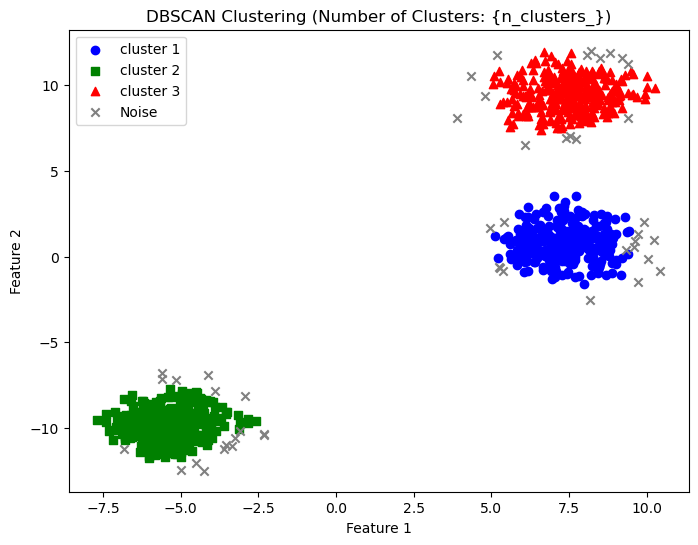

In [9]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_db == 0][:, 0], X[y_db == 0][:, 1], c='blue', marker='o', label="cluster 1")
plt.scatter(X[y_db == 1][:, 0], X[y_db == 1][:, 1], c='green', marker='s', label="cluster 2")
plt.scatter(X[y_db == 2][:, 0], X[y_db == 2][:, 1], c='red', marker='^', label="cluster 3")
plt.scatter(X[y_db == -1][:, 0], X[y_db == -1][:, 1], c='gray', marker='x', label="Noise")
plt.legend()
plt.title("DBSCAN Clustering (Number of Clusters: {n_clusters_})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()